# Rethorical Questions #

Hypothese:
Toxic statements are often hidden within rhetorical questions

Reason: “It is common practice to wrap toxic statements online within rhetorical or suggestive questions as pointed out by Schmidt and Wiegand (2017).” (Challenges for Toxic Comment Classification: An In-Depth Error Analysis”, van Aken et al. 2018)

#### Example ####

ID: 4
Label: False
Prediction: True
Confidence: 0.9357987
Comment: Also muss ich aufgrund der Angst anders anziehen und auf jegliche Religionsfreiheit uä verzichten wegen dem Faschismus im Osten?

ID: 38
Label: False
Prediction: True
Confidence: 0.9646481
Comment: Was macht die Frau in Deutschland? Sich vor der Wehrpflicht zu drücken, begründet kein Asyl. Und Migranten kennt unser Asylrecht nicht. Also, was macht die Frau hier?

ID: 205
Label: False
Prediction: True
Confidence: 0.5124429
Comment: Wenn der \"Leibwächter von Bin Laden\" kein waschechter Terrorist ist, was war dann Bin Laden selbst?

In [6]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb
%run ../lib/diagram_generator.ipynb

data = load_data('../data/predictions.json')

In [7]:
question_words = ['wer', 'wie', 'was', 'wieso', 'warum', 'weshalb', 'wo', 'wohin', 'woher', 'wann', 'wen', 'wem', 'woran', 'worauf', 'wozu', 'weswegen']


# als Teilwort
def all(c):
    return True
def contains_question(element):
    hasQW = False
    for token in element['tokens']:
        for question_word in question_words:
            if question_word == token.text.lower():
                hasQW = True
        if token.pos_ == 'PUNCT' and token.text != ',':
            if token.text == '?':
                return True
            hasQW = False
    return False
def contains_exclamation(element):
    hasQW = False
    for token in element['tokens']:
        for question_word in question_words:
            if question_word == token.text.lower():
                hasQW = True
        if token.pos_ == 'PUNCT' and token.text != ',':
            if token.text == '!':
                return True
            hasQW = False
    return False

In [8]:
show_data(contains_question)

id,label,prediction,text,probability
4,False,True,Also muss ich aufgrund der Angst anders anziehen und auf jegliche Religionsfreiheit uä verzichten wegen dem Faschismus im Osten?,0.9357987
21,False,False,"Wie es wohl der CSU in Bayern schmecken wird, in den kommenden vier Jahren mit den braunen GrünInnen eine Koalition eingehen zu müssen, nur um weiter in Bayern Pöstchen zu ergattern?",0.5664595
22,True,True,"Was beginnt nun, ein erneutes Verfahren bei denen wieder Richter*innen an der Realität vorbei urteilen. Wenn dieser Islamist wieder Menschen für den IS anwirbt, was dann? Dann waschen sich diese Richter*innen ihre blutigen Hände in Unschuld.",0.9686386
32,True,True,Wie lange schauen unsere Politiker noch unserem Untergang zu?,0.9720097
33,False,False,"Das, was Linke und Grüne hier veranstalten, ist ein Konjunkturprogramm für alle rechten Populisten und Extremisten.\xa0 Sehen sie das nicht oder ist das gewolltes Handeln?",0.82411194
38,False,True,"Was macht die Frau in Deutschland? Sich vor der Wehrpflicht zu drücken, begründet kein Asyl. Und Migranten kennt unser Asylrecht nicht. Also, was macht die Frau hier?",0.9646481
42,False,True,"Und der nächste aus dem Saarland in der Freak-Show der obskuren Auftritte ! Wird ein wenig viel in letzter Zeit, nich ? Dieses Ländle erscheint doch recht merkwürdig ! Erich der Dachdecker, das M.-Männchen, AKK-der Zwilling von Frau Merkel, jetzt noch dieser Märchenonkel. Dagegen ist ja die Augsburger Puppenkiste als höchst seriös zu bezeichnen ! Oder Pittiplatsch mit seinem Gequatsche",0.55765635
43,True,False,"Einzig eine konsequente Ausweisung dieser Straftäter, in diesem Fall zuerst die Aberkennung der deutschen Staatsbürgerschaft, wie ist er überhaupt an die gekommen? Schon allein das bedürfte einer Untersuchung. Nur diese Maßnahme kann halbwegs weiter öffentliche Übergriffe verhindern",0.52690274
65,False,False,Was ein rassistischer Komentar?!! Du dreckiger Nazi! Sei froh dass sie eure Ärsche wäscht,0.81007767
66,False,False,"Noch habe ich die Hoffnung nicht ganz aufgegeben, daß sich der gesunde Menschenverstand gegenüber unseren linksgrün versifften, gehirngewaschenen Ideologen in Politik und Medien letztlich doch noch durchsetzen wird. Aber wird es bis dahin nicht schon zu spät sein?",0.8325262


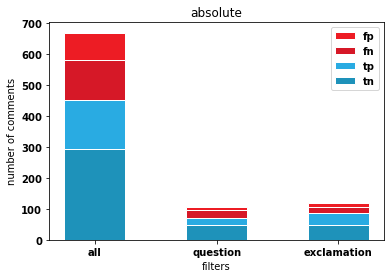

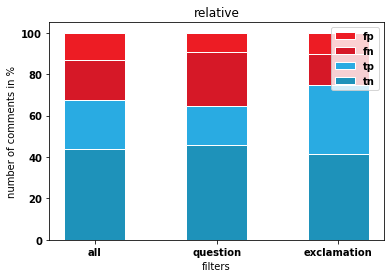

In [9]:
diagram_filters = []
diagram_filters.append(('all', all))
diagram_filters.append(('question', contains_question))
diagram_filters.append(('exclamation', contains_exclamation))

create_plt(name = "absolute", filters = diagram_filters, relative = False)
create_plt(name = "relative", filters = diagram_filters, relative = True)

In [10]:
print('all')
show_metrics(calc_metrics())
print('question')
show_metrics(calc_metrics(diagram_filters[1][1]))
print('question change')
show_metrics(calc_metric_difference(calc_metrics(diagram_filters[1][1])))

all


,label hate (287),label nohate (383)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


question


,label hate (48),label nohate (59)
pred hate (30),20,10
pred nohate (77),28,49


accuracy,precision,recall,f1_score
0.6448598130841121,0.6666666666666666,0.4166666666666667,0.5128205128205129


question change


,label hate (287),label nohate (383)
pred hate (263),185,78
pred nohate (407),102,305


accuracy,precision,recall,f1_score
0.7313432835820896,0.7034220532319392,0.6445993031358885,0.6727272727272727
